In [1]:
# Create Test Dataset

import os
import random
import shutil
from pathlib import Path


def delete_all_files(directory_path : os.path ):
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)

        if os.path.isfile(item_path):
            os.remove(item_path)

        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)


def create_test_dataset(input_folder: os.path, output_folder: os.path, fraction: float, with_class : bool):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    else:
        delete_all_files(output_folder)

    for folder in os.listdir(input_folder):
        folder_path = os.path.join(input_folder, folder)
        
        if with_class == True: 
            output_folder_path = os.path.join(output_folder,folder)
            if not os.path.exists(output_folder_path):
                os.makedirs(output_folder_path)
        
        if os.path.isdir(folder_path):
            files = os.listdir(folder_path)

            num_files_to_select = int(len(files) * fraction)

            selected_files = random.sample(files, num_files_to_select)

            for file_name in selected_files:
                source_path = os.path.join(folder_path, file_name)
                if with_class == False:
                    destination_path = os.path.join(output_folder, file_name)
                    shutil.copyfile(source_path, destination_path)
                else:
                    destination_path = os.path.join(output_folder_path,file_name)
                    shutil.copyfile(source_path, destination_path)


directory = Path(os.path.abspath('')).parents[0]
input_folder = os.path.join(directory,"data/rvl_cdip_1000_samples")
output_folder = os.path.join(directory,"data/test")
fraction = 0.2  # 20% of documents will be randomly selected

create_test_dataset(input_folder, output_folder, fraction,with_class=True)


# Profiling

In [21]:
import os
from pathlib import Path
from PIL import Image
import pytesseract

directory = Path(os.path.abspath('')).parents[0]

sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")

# osd_data = []

# for each_class in sorted(os.listdir(sample_data_dir)):
#     if each_class != ".DS_Store":
#         class_dir = os.path.join(sample_data_dir,each_class)
#         for each_item in os.listdir(class_dir):    
#             item_path = os.path.join(class_dir,each_item)
#             print(item_path)
#             try:
#                 osd_result = pytesseract.image_to_osd(Image.open(item_path),config='--psm 0 -c min_characters_to_try=5')
#                 osd_result_dict = {line.split(':')[0].strip().replace(' ','_'): line.split(':')[1].strip() for line in osd_result.split("\n") if ':' in line}
#                 osd_result_dict.update({"image_name":each_item})
#                 osd_result_dict.update({"image_class":each_class})
#                 osd_data.append(osd_result_dict)
                
#             except Exception as e:
#                 osd_result_dict = {}
#                 osd_result_dict["image_name"]= each_item
#                 osd_result_dict["image_class"]= each_class
#                 osd_result_dict["Page_number"]= None
#                 osd_result_dict["Orientation_in_degrees"]= None
#                 osd_result_dict["Rotate"]= None
#                 osd_result_dict["Orientation_confidence"]= None
#                 osd_result_dict["Script"]= None
#                 osd_result_dict["Script_confidence"]= None
#                 osd_data.append(osd_result_dict)

In [12]:
import pandas as pd

# pd.DataFrame(osd_data).to_csv(os.path.join(directory,"data/inspect/osd_profiling.csv"),index=False)

osd_df = pd.read_csv(os.path.join(directory,"data/inspect/osd_profiling.csv"))
osd_df

Page_number  Orientation_in_degrees  Rotate  Orientation_confidence  \
0            0.0                   180.0   180.0                    1.00   
1            0.0                   180.0   180.0                    0.13   
2            0.0                   180.0   180.0                    0.55   
3            0.0                     0.0     0.0                    0.28   
4            0.0                     0.0     0.0                    0.37   
..           ...                     ...     ...                     ...   
995          0.0                     0.0     0.0                    0.16   
996          0.0                     0.0     0.0                    0.48   
997          0.0                     0.0     0.0                    0.16   
998          0.0                   270.0    90.0                    0.08   
999          0.0                     0.0     0.0                    1.14   

       Script  Script_confidence      image_name  image_class  
0    Cyrillic               0.00  image_0794.png            0  
1    Cyrillic              10.00  image_0757.png            0  
2       Latin               0.56  image_0395.png            0  
3      Arabic               3.33  image_0427.png            0  
4    Katakana               0.00  image_0552.png            0  
..        ...                ...             ...          ...  
995  Cyrillic               0.00  image_0837.png            9  
996  Cyrillic               1.11  image_0189.png            9  
997  Cyrillic               1.67  image_0764.png            9  
998     Latin               6.67  image_0994.png            9  
999  Cyrillic               1.33  image_0349.png            9  

[1000 rows x 8 columns]

In [61]:
osd_df.isnull().sum()

Page_number               46
Orientation_in_degrees    46
Rotate                    46
Orientation_confidence    46
Script                    46
Script_confidence         46
image_name                 0
image_class                0
dtype: int64

In [60]:

osd_df.describe()

Page_number  Orientation_in_degrees      Rotate  \
count        954.0              954.000000  954.000000   
mean           0.0               86.226415   82.075472   
std            0.0               97.842492   93.683458   
min            0.0                0.000000    0.000000   
25%            0.0                0.000000    0.000000   
50%            0.0                0.000000    0.000000   
75%            0.0              180.000000  180.000000   
max            0.0              270.000000  270.000000   

       Orientation_confidence  Script_confidence  image_class  
count              954.000000         954.000000  1000.000000  
mean                 0.464015           2.618249     7.959000  
std                  0.434305           3.834464     4.654996  
min                  0.000000           0.000000     0.000000  
25%                  0.150000           0.000000     4.000000  
50%                  0.330000           1.670000     8.000000  
75%                  0.660000           3.330000    12.000000  
max                  2.760000          43.330000    15.000000

# Display

In [47]:
import os
from pathlib import Path
from PIL import Image
import pytesseract
from matplotlib import pyplot as plt
import cv2
import re

directory = Path(os.path.abspath('')).parents[0]

sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")

osd_data = []

#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 150
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()


# for each_class in sorted(os.listdir(sample_data_dir)):
#     if each_class != ".DS_Store":
#         class_dir = os.path.join(sample_data_dir,each_class)
#         for each_item in os.listdir(class_dir):    
#             item_path = os.path.join(class_dir,each_item)
#             print(item_path)
#             display(item_path)
#             display(rotate(item_path))
#             break
#     break



In [22]:
item_path = os.path.join(sample_data_dir,"12/image_0608.png")

# display(im_path=item_path)

# display(rotate(item_path))
# result = pytesseract.image_to_osd(Image.open(item_path),config='--psm 0 -c min_characters_to_try=10')
# print(result)
# result_dict = {line.split(':')[0].strip().replace(' ','_'): line.split(':')[1].strip() for line in result.split("\n") if ':' in line}


# print(result_dict)

# Get Focused Text

In [25]:
import pytesseract
import cv2

directory = Path(os.path.abspath('')).parents[0]
temp_data_dir = os.path.join(directory,"data/samples")
image_path = os.path.join(sample_data_dir,"15/image_0085.png")
image = cv2.imread(image_path)
base_image = image.copy()


gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 10))
dilate = cv2.dilate(thresh, kernal, iterations=1)

cv2.imwrite(temp_data_dir+"/sample_dilated.png",dilate)

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[1])

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h > 200 and w > 250:
        roi = base_image[y:y+h, x:x+w]
        cv2.rectangle(image, (x,y), (x+w, y+h), (36, 255, 12), 2)

cv2.imwrite(temp_data_dir+"/sample_boxes.png", image)

# im_h, im_w, im_d = image.shape
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (7,7), 0)
# thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Create rectangular structuring element and dilate
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,10))
# dilate = cv2.dilate(thresh, kernel, iterations=1)

# # Find contours and draw rectangle
# cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[1])
# for c in cnts:
#     x,y,w,h = cv2.boundingRect(c)
#     if h < 20 and w > 250:
#         roi = base_image[0:y+h, 0:x+im_w]
#         cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        
# cv2.imwrite(temp_data_dir+"/output.png", roi)

True

: 

# Orientation Correction

In [60]:
def rotate_image(image_path):
    
    osd_result = pytesseract.image_to_osd(Image.open(image_path),config='--psm 0 -c min_characters_to_try=5')
    image = cv2.imread(image_path)

    angle = re.search(r'Orientation in degrees: \d+', osd_result).group().split(':')[-1].strip()
    confidence= re.search(r'Orientation confidence: \d+\.\d+', osd_result).group().split(':')[-1].strip()
    confidence = float(confidence)
    if angle=='90':
        rotated_image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)    
    if angle=='180' and confidence :
        rotated_image = cv2.rotate(image, cv2.ROTATE_180)
    if angle=='270':
        rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    else:
        
        rotated_image = image


    return rotated_image


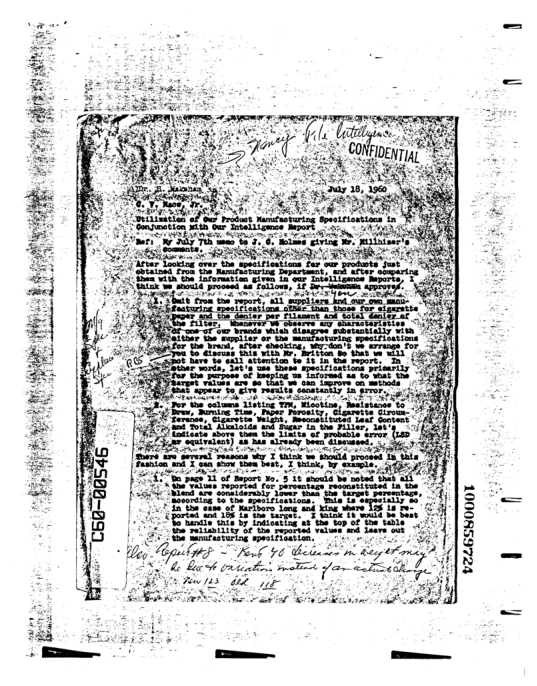

In [61]:
from pathlib import Path
import os
import pytesseract
import cv2

directory = Path(os.path.abspath('')).parents[0]
temp_data_dir = os.path.join(directory,"data/samples")
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")
output_file = temp_data_dir + "/sample_rotated.png"

# image_path = os.path.join(sample_data_dir,"6/image_0732.png")
image_path = os.path.join(sample_data_dir,"15/image_0756.png")
rotated_image = rotate_image(image_path)
cv2.imwrite(output_file,rotated_image)

display(output_file)

# Normalization

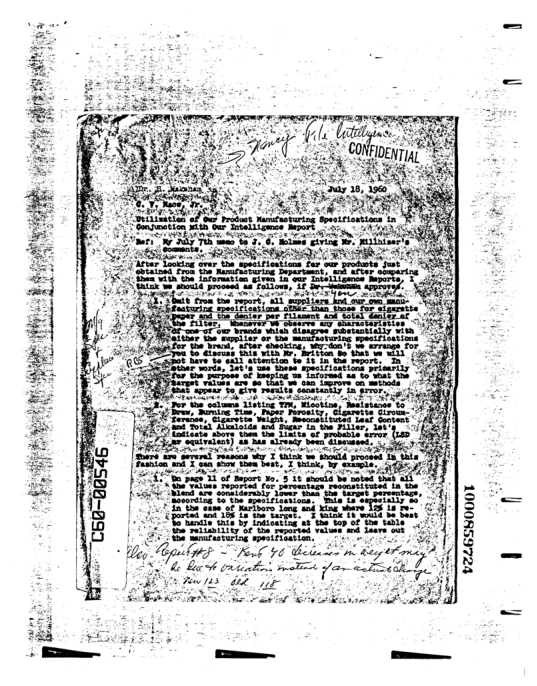

In [62]:
from pathlib import Path
import os
import pytesseract
import cv2
import numpy as np

directory = Path(os.path.abspath('')).parents[0]
temp_data_dir = os.path.join(directory,"data/samples")
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")

# image_path = os.path.join(sample_data_dir,"6/image_0732.png")
image_path = os.path.join(sample_data_dir,"15/image_0756.png")
# image_path = os.path.join(sample_data_dir,"15/image_0660.png")
output_file = temp_data_dir + "/sample_normalized.png"


def normalize_image(image_path):
    image = cv2.imread(image_path)
    norm_img = np.zeros((image.shape[0], image.shape[1]))
    img = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
    return img

normalized_image = normalize_image(image_path)

cv2.imwrite(output_file,normalized_image)

display(output_file)

# Image Scaling

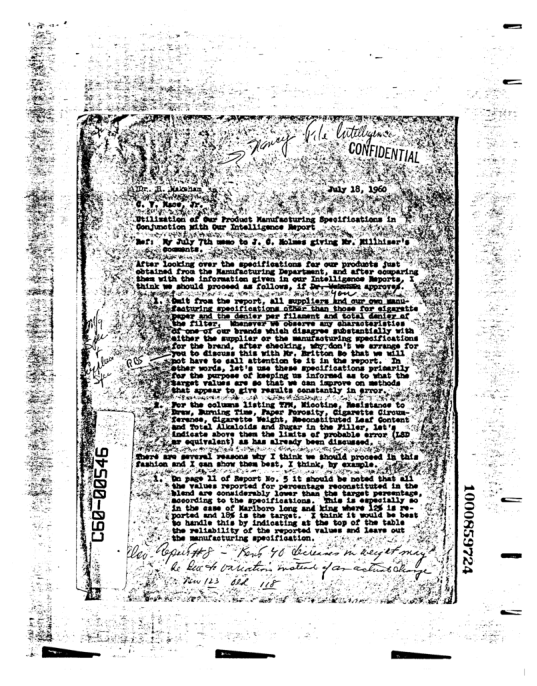

In [64]:
from PIL import Image

directory = Path(os.path.abspath('')).parents[0]
temp_data_dir = os.path.join(directory,"data/samples")
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")

# image_path = os.path.join(sample_data_dir,"6/image_0732.png")
image_path = os.path.join(sample_data_dir,"15/image_0756.png")
# image_path = os.path.join(sample_data_dir,"15/image_0660.png")
output_file = temp_data_dir + "/sample_scaled.png"

def set_image_dpi(file_path,output_file):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.Resampling.LANCZOS)
    im_resized.save(output_file, dpi=(300, 300))
    return output_file


img_scaled_path = set_image_dpi(image_path,output_file)
display(img_scaled_path)




# Denoising

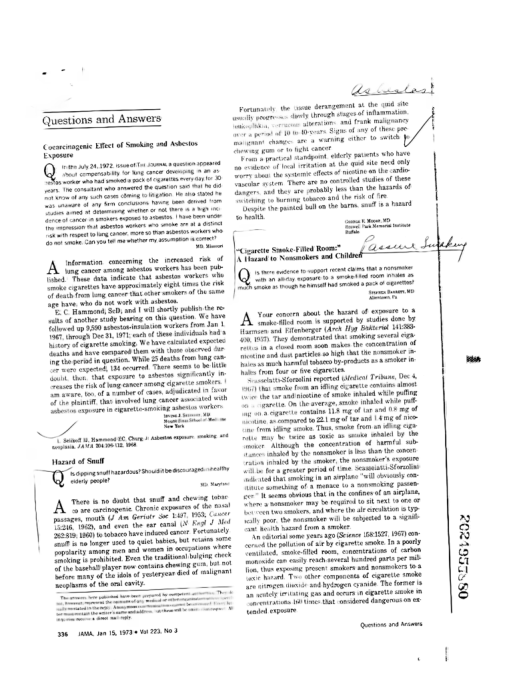

In [114]:
from pathlib import Path
import os
import pytesseract
import cv2
import numpy as np

directory = Path(os.path.abspath('')).parents[0]
temp_data_dir = os.path.join(directory,"data/samples")
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")

image_path = os.path.join(sample_data_dir,"6/image_0732.png")
# image_path = os.path.join(sample_data_dir,"15/image_0756.png")
# image_path = os.path.join(sample_data_dir,"15/image_0660.png")
output_file = temp_data_dir + "/sample_denoised.png"

def remove_noise(image_path):
    image = cv2.imread(image_path)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        denoised_image = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)
    return denoised_image
    
    

denoised_image = remove_noise(image_path)

cv2.imwrite(output_file,denoised_image)

display(output_file)

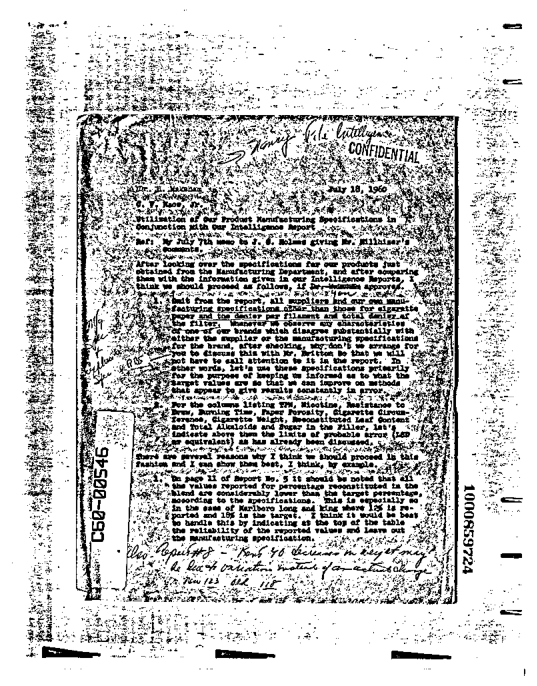

In [91]:
import cv2
import numpy as np
from skimage import io, filters

directory = Path(os.path.abspath('')).parents[0]
temp_data_dir = os.path.join(directory,"data/samples")
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")

# image_path = os.path.join(sample_data_dir,"6/image_0732.png")
image_path = os.path.join(sample_data_dir,"15/image_0756.png")
# image_path = os.path.join(sample_data_dir,"15/image_0660.png")
output_file = temp_data_dir + "/sample_threshold.png"


def adaptive_thresholding(image_path):
    image = cv2.imread(image_path)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # thresholded_image = filters.threshold_sauvola(image, window_size=window_size, k=k, r=r)
    # do adaptive threshold on gray image
    thresholded_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
    return thresholded_image

thresholded_image = adaptive_thresholding(image_path)


cv2.imwrite(output_file,thresholded_image)

display(output_file)

# Remove Vertical and Horizontal Lines with Bitwise

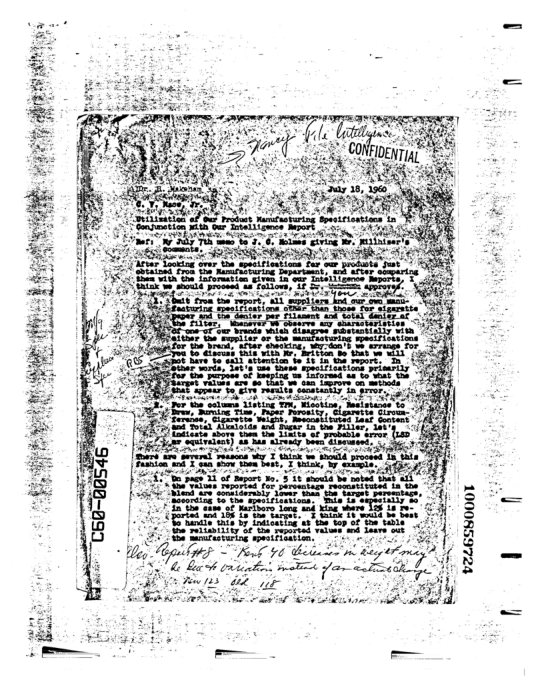

In [109]:
import cv2
import numpy as np
from skimage import io, morphology
import matplotlib.pyplot as plt


directory = Path(os.path.abspath('')).parents[0]
temp_data_dir = os.path.join(directory,"data/samples")
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")

# image_path = os.path.join(sample_data_dir,"6/image_0732.png")
image_path = os.path.join(sample_data_dir,"15/image_0756.png")
# image_path = os.path.join(sample_data_dir,"15/image_0660.png")
output_file = temp_data_dir + "/sample_horizontal.png"



def remove_lines(image_path):
    image = cv2.imread(image_path)

    kernel_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, (1,50))
    remove_vertical = 255 - cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_vertical)

    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
    remove_horizontal = 255 - cv2.morphologyEx(image, cv2.MORPH_CLOSE, horizontal_kernel)

    remove_both = cv2.add(remove_vertical, remove_horizontal)
    result = cv2.add(remove_both, image)
    return result


processed_image = remove_lines(image_path)

cv2.imwrite(output_file,processed_image)

display(output_file)

# Image Thinning and Skeletonization (Handwritten)

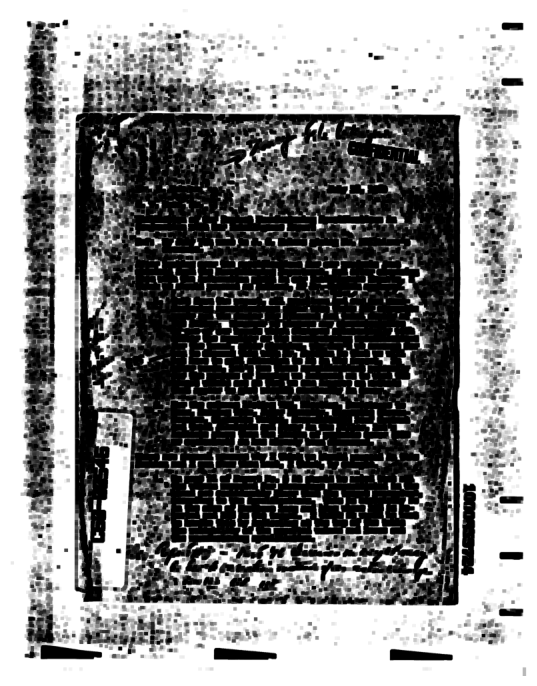

In [106]:
import cv2
import numpy as np
from skimage import io, morphology
import matplotlib.pyplot as plt


directory = Path(os.path.abspath('')).parents[0]
temp_data_dir = os.path.join(directory,"data/samples")
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")

# image_path = os.path.join(sample_data_dir,"6/image_0732.png")
image_path = os.path.join(sample_data_dir,"15/image_0756.png")
# image_path = os.path.join(sample_data_dir,"15/image_0660.png")
output_file = temp_data_dir + "/sample_thinned.png"


def thinning_skeletonization(image_path):
    image = cv2.imread(image_path,0)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    kernel = np.ones((5,5),np.uint8)
    thinned_image = cv2.erode(image,kernel,iterations = 1)
    return thinned_image


# Apply thinning and skeletonization
thinned_image = thinning_skeletonization(image_path)

cv2.imwrite(output_file,thinned_image)

display(output_file)

# Deskew

In [110]:
import math
from typing import Tuple, Union

import cv2
import numpy as np

from deskew import determine_skew


def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)


image_path = os.path.join(sample_data_dir,"1/image_0661.png")
image = cv2.imread(image_path)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# angle = determine_skew(image)

angle = determine_skew(grayscale)

print(angle)

rotated = rotate(image, angle, (0, 0, 0))
# cv2.imwrite('output.png', rotated)

cv2.imwrite(temp_data_dir+"/sample_deskew.png",rotated)

0.0


True

# Contrast Enhancement

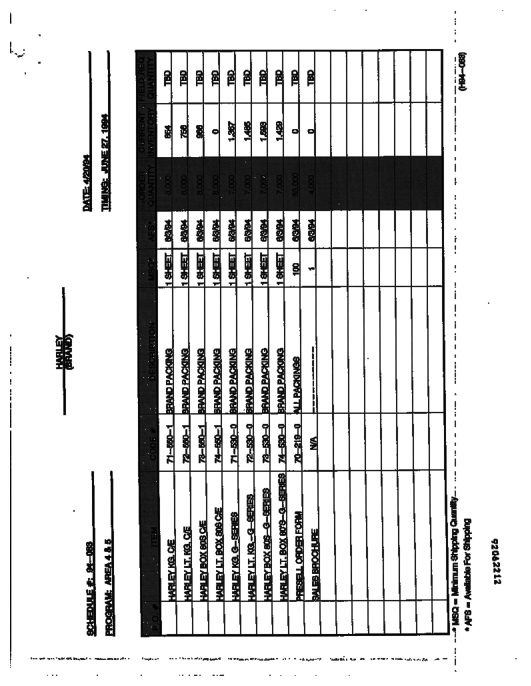

In [120]:
import cv2
import numpy as np

directory = Path(os.path.abspath('')).parents[0]
temp_data_dir = os.path.join(directory,"data/samples")
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")

image_path = os.path.join(sample_data_dir,"1/image_0121.png")
# image_path = os.path.join(sample_data_dir,"6/image_0732.png")
# image_path = os.path.join(sample_data_dir,"15/image_0756.png")
# image_path = os.path.join(sample_data_dir,"15/image_0660.png")
output_file = temp_data_dir + "/sample_equalized.png"

def enhance_contrast(image_path):
    # Read the image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(original_image,)
    
    return equalized_image



processed_image = enhance_contrast(image_path)

cv2.imwrite(output_file,processed_image)

display(output_file)
